<a href="https://colab.research.google.com/github/disha2sinha/CropYield-prediction/blob/master/Copy_of_CropPrediction(Bangalore_rural).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset(Bangalore rural District)

In [0]:
from google.colab import files
uploaded=files.upload()

Saving banglore rural.csv to banglore rural.csv


In [0]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['banglore rural.csv']))
df.rename(columns={'vapour_pressure area':'vapour_pressure','Unnamed: 5':'area'},inplace=True)
df

,year,percipitation,min_temp,cloud_cover,vapour_pressure,area,production
0,1990,687.852,24.644,47.296,20.881,85132,158203
1,1991,999.029,24.745,47.264,21.061,92126,216648
2,1992,833.158,24.572,47.264,20.764,87069,190062
3,1993,907.470,24.657,47.264,20.869,88881,233125
4,1994,607.299,24.594,47.264,20.866,94379,279101
5,1995,953.881,24.912,47.264,21.194,124799,516395
6,1996,1074.976,24.839,49.347,21.012,134979,509823
7,1997,1058.408,25.094,48.591,21.111,136979,410243
8,1998,1198.163,25.389,48.729,21.445,124980,465402
9,1999,912.056,24.758,47.139,20.799,144970,520978


### Showing correlation between dependent and independent variables

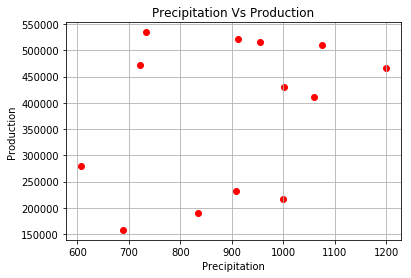

In [0]:
plt.scatter(df['percipitation'],df['production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

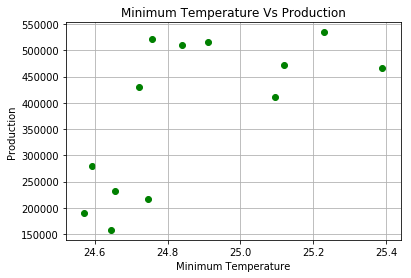

In [0]:
plt.scatter(df['min_temp'],df['production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

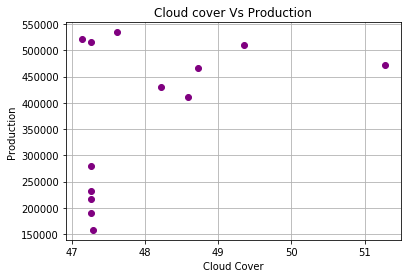

In [0]:
plt.scatter(df['cloud_cover'],df['production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

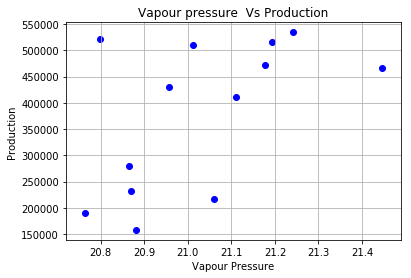

In [0]:
plt.scatter(df['vapour_pressure'],df['production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

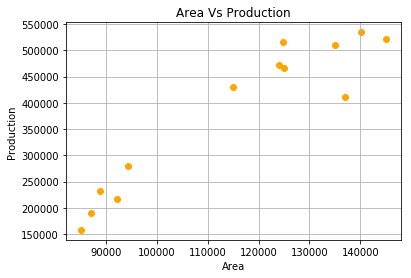

In [0]:
plt.scatter(df['area'],df['production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:

X = df[['percipitation'	,'min_temp'	,'cloud_cover'	,'vapour_pressure'	,'area']] 
Y = df['production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [112700.69865821 145741.6808692  256900.07965523] 


Coefficients:  [-1.16285319e+02 -5.34334223e+05  1.20267223e+04  6.89358789e+05
  8.12257887e+00] 


R-squared score:  -2.5591733549934093 



**ROW-wise Regression**

In [0]:
predicted_production=[]
actual_production=[]
for i in df.index.values:
  A_test=df.iloc[df.index==i].drop(['production'],axis=1)
  b_test=df.iloc[df.index==i]['production']
  A_train=df.drop(['production'],axis=1).drop([i],axis=0)
  b_train=df.drop([i])['production']
  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  actual_production.append(b_test.get_values()[0])
  predicted_production.append(b_pred[0])
print('Predicted Production:',predicted_production,'\n')
print('Actual Production:',actual_production,'\n')


Predicted Production: [173529.8598503247, 283112.54038207605, 157781.1223358363, 195454.63804703578, 282786.6848876178, 441303.4773427956, 477249.26137785986, 483298.7631838657, 384326.18339669704, 490079.64029946923, 528643.3460809812, 438929.8849507943, 565053.0877897106] 

Actual Production: [158203, 216648, 190062, 233125, 279101, 516395, 509823, 410243, 465402, 520978, 430142, 472013, 534214] 



**Calculating RMS error**

In [0]:
import math
sum_error=0
for i in range(len(predicted_production)):
  diff=actual_production[i]-predicted_production[i]
  pow_diff=math.pow(diff,2)
  sum_error=sum_error+pow_diff
root_error=math.sqrt(sum_error)
rms_error=root_error/len(predicted_production)
print('\nRMS error: ',rms_error,'\n')


RMS error:  15081.656774675099 

